## Dimensionality Reduction

In this script, we will:

1. Load and preprocess the dataset.
2. Perform UMAP (Uniform Manifold Approximation and Projection).
3. Visualize the points in a 2-dimensional space colored by labels.

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import umap

### Task 1: Load the CSV file, define relevant groups, and create dataframes

Same as before

In [2]:
# Load CSV
df = pd.read_csv("../ravdess_processed_data/combined_summary_updated.csv") 

# Define columns
general_info_cols = ["id", "sex", "condition"]

audio_feature_cols = [
    "f0_mean","f0_stddev","f0_range","f1_mean","f1_stddev","f1_range",
    "f2_mean","f2_stddev","f2_range","f3_mean","f3_stddev","f3_range",
    "f4_mean","f4_stddev","f4_range","loudness_mean","loudness_stddev","loudness_range",
    "hnr_mean","hnr_stddev","hnr_range","jitter","jitter_abs","jitter_rap","jitter_ppq5",
    "jitter_ddp","shimmer","shimmer_db","shimmer_apq3","shimmer_apq5","shimmer_apq11",
    "shimmer_dda","gne_ratio","mfcc1_mean","mfcc2_mean","mfcc3_mean","mfcc4_mean","mfcc5_mean",
    "mfcc6_mean","mfcc7_mean","mfcc8_mean","mfcc9_mean","mfcc10_mean","mfcc11_mean","mfcc12_mean",
    "mfcc13_mean","mfcc14_mean","mfcc1_var","mfcc2_var","mfcc3_var","mfcc4_var","mfcc5_var",
    "mfcc6_var","mfcc7_var","mfcc8_var","mfcc9_var","mfcc10_var","mfcc11_var","mfcc12_var",
    "mfcc13_var","mfcc14_var","cpp_mean","cpp_var","spir","dur_med","dur_mad","silence_ratio",
    "rel_f0_sd","rel_se0_sd"
]

video_feature_cols = [
    "anger_mean","disgust_mean","fear_mean","happiness_mean","sadness_mean","surprise_mean",
    "neutral_mean","AU01_mean","AU02_mean","AU04_mean","AU05_mean","AU06_mean","AU07_mean",
    "AU09_mean","AU10_mean","AU11_mean","AU12_mean","AU14_mean","AU15_mean","AU17_mean",
    "AU20_mean","AU23_mean","AU24_mean","AU25_mean","AU26_mean","AU28_mean","AU43_mean",
    "mouth_openness_mean","anger_std","disgust_std","fear_std","happiness_std","sadness_std",
    "surprise_std","neutral_std","AU01_std","AU02_std","AU04_std","AU05_std","AU06_std","AU07_std",
    "AU09_std","AU10_std","AU11_std","AU12_std","AU14_std","AU15_std","AU17_std","AU20_std",
    "AU23_std","AU24_std","AU25_std","AU26_std","AU28_std","AU43_std","mouth_openness_std"
]

# Create separate DataFrames
audio_df = df[general_info_cols + audio_feature_cols]
video_df = df[general_info_cols + video_feature_cols]
combined_df = df[general_info_cols + audio_feature_cols + video_feature_cols]

### Task 2: Preprocess the data

Follow the steps:

1. Separate features and target (and drop metadata columns)
2. Impute missing values (sklearn - SimpleImputer)
3. Scale features (sklearn - StandardScaler)

In [3]:
def preprocess_data(df, target, metadata_cols=["id", "condition","sex"]):
    """
    Preprocess dataset for modeling: drop metadata, separate target, impute missing values, and scale features.

    Args:
        df (pd.DataFrame): Input dataset
        target (str): Name of the target column
        metadata_cols (list, optional): Columns to drop

    Returns:
        X_scaled (np.ndarray): Scaled feature matrix
        y (pd.Series): Target labels
    """
      
    # Separate target and features
    y = df[target]
    X = df.drop(columns=metadata_cols)

    # Impute missing values
    imputer = SimpleImputer(strategy="mean")
    X_imputed = imputer.fit_transform(X)

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_imputed)

    return X_scaled, y

### Task 3: UMAP Dimensionality Reduction

🎯 Use UMAP (Uniform Manifold Approximation and Projection) to project high-dimensional features into 2D for visualization.

UMAP is a non-linear dimensionality reduction technique that preserves both local and global structure, making it ideal for visualizing complex high-dimensional data in 2D or 3D.

In [4]:
# TODO: Implement a function for umap reduction
def umap_reducer(X, n_components=2, n_neighbors=15):
    """
    Reduce feature matrix to lower dimensions using UMAP.

    Args:
        X (np.ndarray or pd.DataFrame): Feature matrix
        n_components (int): Number of dimensions to reduce to (default=2)
        n_neighbors (int): Number of neighbors for UMAP (default=15)

    Returns:
        X_umap (np.ndarray): UMAP-transformed features
    """
    #return None
     
    # Fit UMAP and transform features
    reducer = umap.UMAP(n_components=n_components, n_neighbors=n_neighbors, random_state=42)
    X_umap = reducer.fit_transform(X)
    
    return X_umap

<details>
<summary><span style="font-size:20px; color:darkgoldenrod; font-weight:bold;">Click to see the solution</span></summary>

```python
def umap_reducer(X, n_components=2, n_neighbors=15):
    """
    Reduce feature matrix to lower dimensions using UMAP.

    Args:
        X (np.ndarray or pd.DataFrame): Feature matrix
        n_components (int): Number of dimensions to reduce to (default=2)
        n_neighbors (int): Number of neighbors for UMAP (default=15)

    Returns:
        X_umap (np.ndarray): UMAP-transformed features
    """
    # Fit UMAP and transform features
    reducer = umap.UMAP(n_components=n_components, n_neighbors=n_neighbors, random_state=42)
    X_umap = reducer.fit_transform(X)
    
    return X_umap

### Task 4: Visualization 

Plot the UMAP projections colored by labels.

In [5]:
def plot_umap(X_umap, y, target_label, dataset_name):
    """
    Plot 2D UMAP projection colored by target labels.

    Args:
        X_umap (np.ndarray): UMAP-transformed features
        y (array-like): target labels for coloring
        target_label (str): name of the target 
        dataset_name (str): dataset name for the title (e.g., 'Video', 'Audio')
    """
    try:
        plt.figure(figsize=(8, 6))
        # Scatter plot with labels as colors
        sns.scatterplot(
            x=X_umap[:, 0], 
            y=X_umap[:, 1], 
            hue=y, 
            palette="tab10", 
            s=50
        )
        plt.title(f"{dataset_name} Features UMAP - Colored by {target_label.capitalize()}")
        plt.xlabel("UMAP 1")
        plt.ylabel("UMAP 2")
        plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"[Warning] Could not plot")
        print("Most likely the code is not yet complete (complete the cells with TODO).\n")

### Task 5: Apply UMAP to Combined Features

Cluster by condition (emotion) and sex

/homes/rpardhi/miniconda3/envs/workshop/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


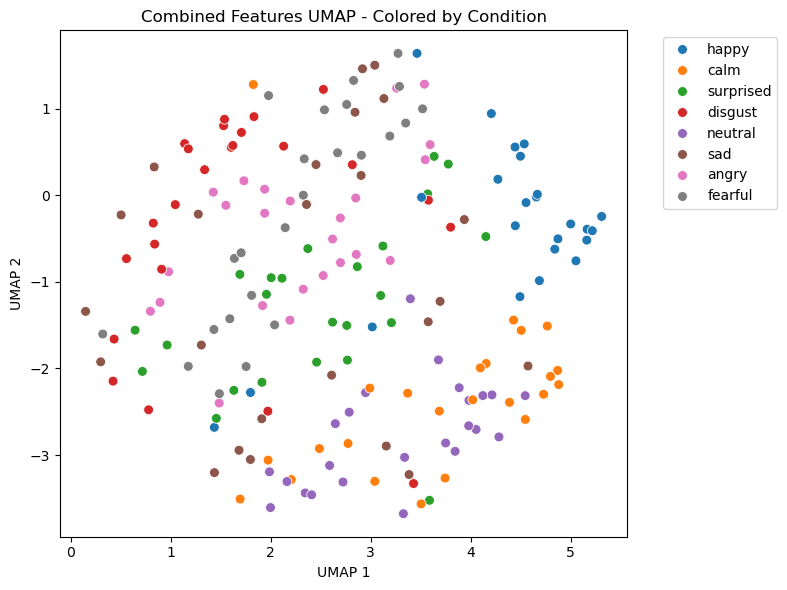

In [6]:

X_emo_combined, y_emo_combined = preprocess_data(combined_df, "condition")
X_umap_combined = umap_reducer(X_emo_combined)
plot_umap(X_umap_combined, y_emo_combined, "condition", "Combined")


/homes/rpardhi/miniconda3/envs/workshop/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


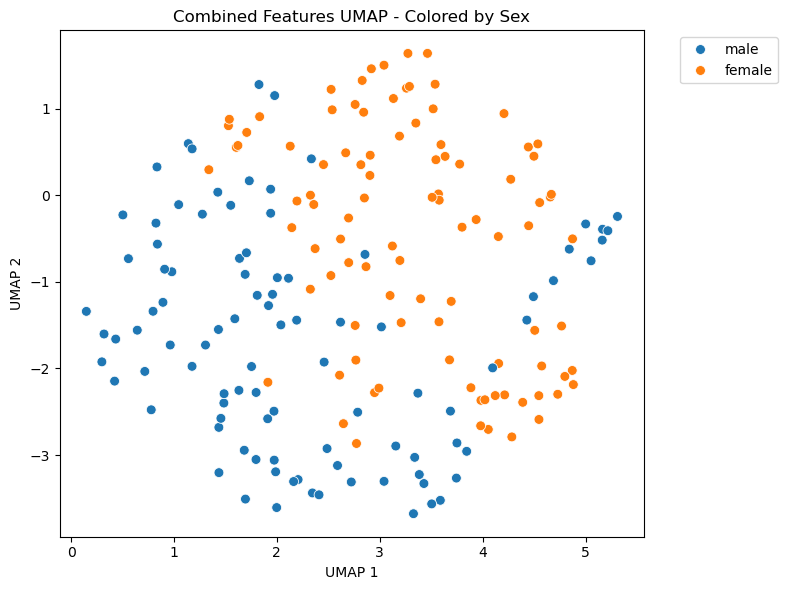

In [7]:
X_sex_combined, y_sex_combined = preprocess_data(combined_df, "sex")
X_umap_combined = umap_reducer(X_sex_combined)
plot_umap(X_umap_combined, y_sex_combined, "sex", "Combined")


### Insight?

❓ Can we visually separate emotions like happy, sad, or angry?

❓ How well can we distinguish between genders?

➡️ Next, evaluate if seperating video and audio features can result in better clusters?

### Task 6: Apply UMAP to Video Features

Cluster by condition (emotion) and sex

/homes/rpardhi/miniconda3/envs/workshop/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


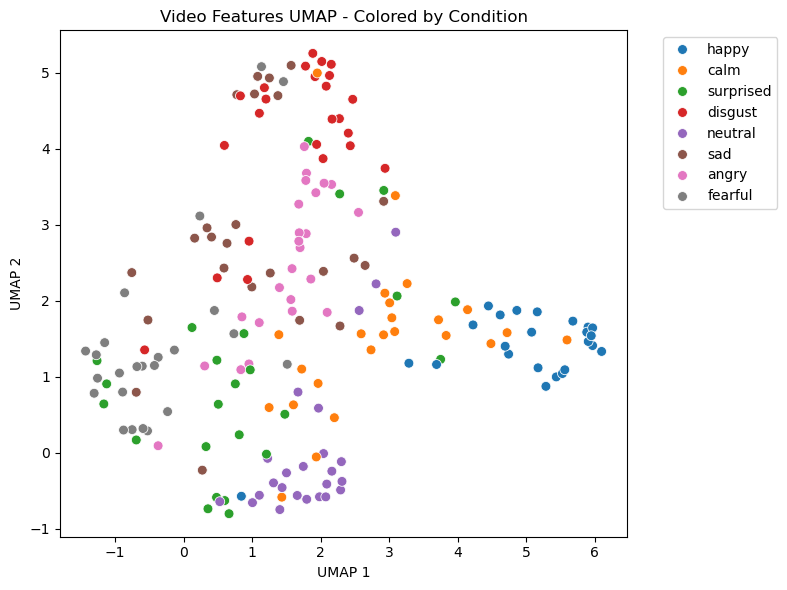

In [8]:
X_emo_video, y_emo_video = preprocess_data(video_df, "condition")
X_umap_video = umap_reducer(X_emo_video)
plot_umap(X_umap_video, y_emo_video, "condition", "Video")



/homes/rpardhi/miniconda3/envs/workshop/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


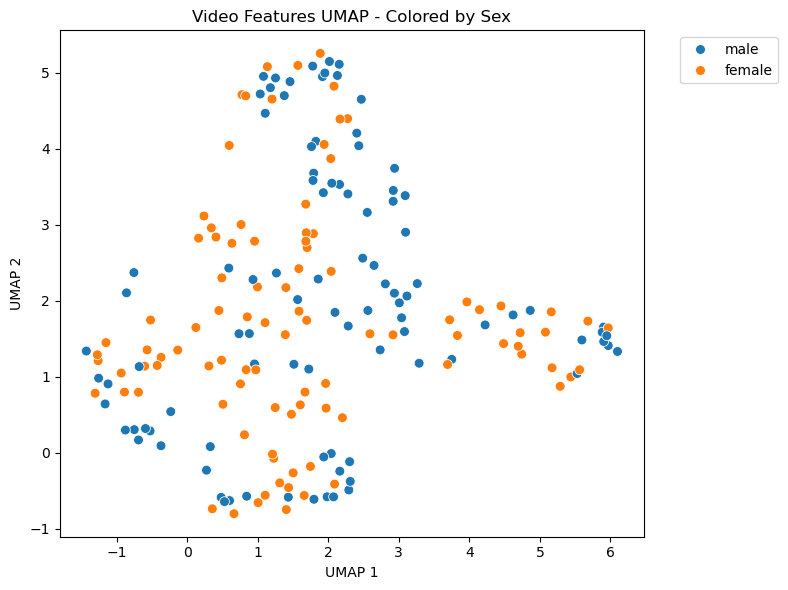

In [9]:
X_sex_video, y_sex_video = preprocess_data(video_df, "sex")
X_umap_video = umap_reducer(X_sex_video)
plot_umap(X_umap_video, y_sex_video, "sex", "Video")

### Insight?

🤔 Do video features alone make it easier or harder to separate emotions or genders?

### Task 7: Apply UMAP to Audio Features

Cluster by condition (emotion) and sex

/homes/rpardhi/miniconda3/envs/workshop/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


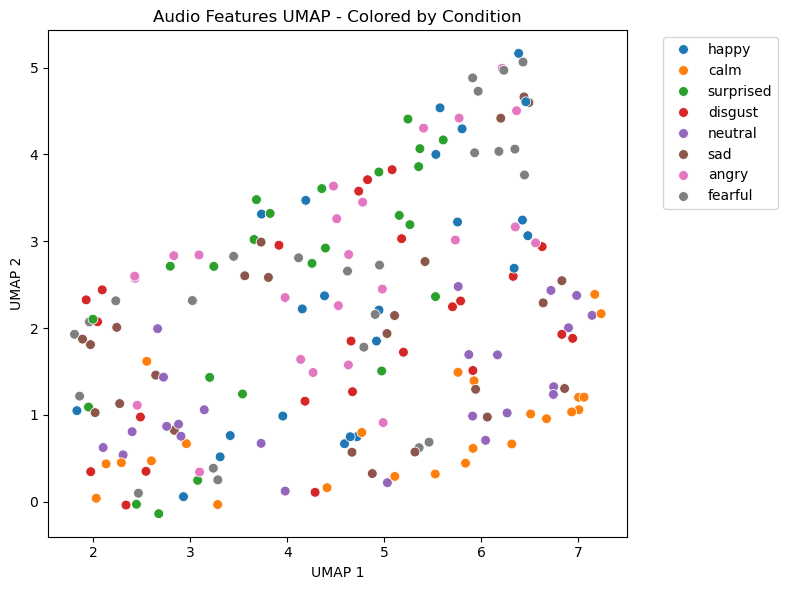

In [10]:

X_emo_audio, y_emo_audio = preprocess_data(audio_df, "condition")
X_umap_audio = umap_reducer(X_emo_audio)
plot_umap(X_umap_audio, y_emo_audio, "condition", "Audio")



/homes/rpardhi/miniconda3/envs/workshop/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


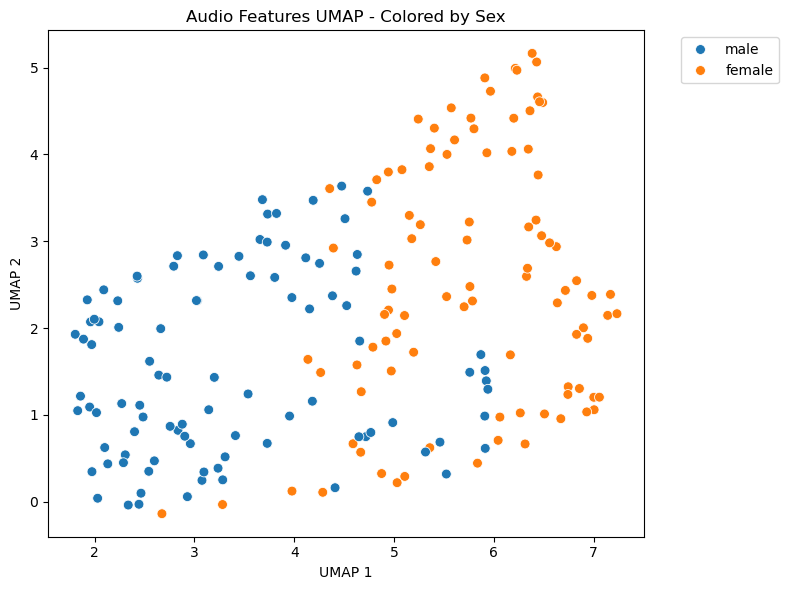

In [11]:

X_sex_audio, y_sex_audio = preprocess_data(audio_df, "sex")
X_umap_audio = umap_reducer(X_sex_audio)
plot_umap(X_umap_audio, y_sex_audio, "sex", "Audio")

### Insight?

🤔 Do audio features alone make it easier or harder to separate emotions or genders?